In [1]:
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from helper_functions.simulate_game import simulate_game
from helper_functions.combine_matrices import combine_team_matrix
import time

In [5]:
#if one team does not have data for a certain starting state, we will get a row of nan's which will break the code.
#if this occurs, we can just substitute the average probability for this row?
avg_matrix = pd.read_excel('first_transition_matrix_with_manual_edits.xlsx', sheet_name = 'Mean Pasted', index_col='Starting_State')

In [113]:
team_A = pd.read_excel("team_specific_matrix/Arizona St._A.xlsx", index_col = 'Starting_State')
team_B = pd.read_excel('team_specific_matrix/Arizona_B.xlsx', index_col = 'Starting_State')

In [114]:
transition_matrix = combine_team_matrix(team_A, team_B)

In [115]:
for r in transition_matrix.index:
    if all(np.isnan(transition_matrix.loc[r])):
        print(r)
        transition_matrix.loc[r]=avg_matrix.loc[r]

Af3
Bf3


In [124]:
abc = simulate_game(transition_matrix, num_games=100)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


In [125]:
totals = []
for item in abc[1]:
    totals.append(item[0]+item[1])

In [126]:
np.mean(totals)

150.74

In [127]:
margins = []
for aaa in abc[1]:
    margins.append(aaa[0]-aaa[1])

In [128]:
from matplotlib import pyplot as plt

(array([ 5.,  8.,  6., 14., 19., 17.,  7.,  9.,  3.,  5.,  3.,  0.,  2.,
         0.,  0.,  0.]),
 array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,
         30.,  35.,  40.,  45.,  50.,  55.]),
 <BarContainer object of 16 artists>)

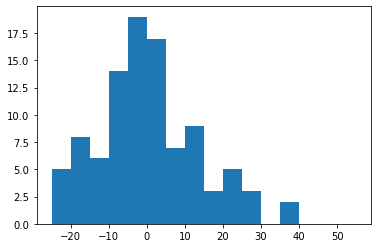

In [129]:
plt.hist(margins, bins=np.linspace(-25,55,17))

In [130]:
np.mean(margins)

-0.82

In [131]:
np.median(margins)

-1.0